Create a report to answer the principal's questions. Include:

What are the top 5 countries with the highest internet use (by population share)?
How many people had internet access in those countries in 2019?
What are the top 5 countries with the highest internet use for each of the following regions: 'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia'?
Create a visualization for those five regions' internet usage over time.
What are the 5 countries with the most internet users?
What is the correlation between internet usage (population share) and broadband subscriptions for 2019?
Summarize your findings.

In [35]:
# Libraries importation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Databases importation and exploration
internet=pd.read_csv("internet.csv")
print(internet.head())

        Entity Code  Year  Internet_Usage
0  Afghanistan  AFG  1990             0.0
1  Afghanistan  AFG  1991             0.0
2  Afghanistan  AFG  1992             0.0
3  Afghanistan  AFG  1993             0.0
4  Afghanistan  AFG  1994             0.0


In [20]:
people=pd.read_csv("people.csv")
print(people.head())

        Entity Code  Year  Users
0  Afghanistan  AFG  1990      0
1  Afghanistan  AFG  1991      0
2  Afghanistan  AFG  1992      0
3  Afghanistan  AFG  1993      0
4  Afghanistan  AFG  1994      0


In [21]:
broadband=pd.read_csv("broadband.csv")
print(broadband.head())

        Entity Code  Year  Broadband_Subscriptions
0  Afghanistan  AFG  2004                 0.000809
1  Afghanistan  AFG  2005                 0.000858
2  Afghanistan  AFG  2006                 0.001892
3  Afghanistan  AFG  2007                 0.001845
4  Afghanistan  AFG  2008                 0.001804


## Creating function checking the culumns names, data types, missing values number and unique values number in each dataframe

In [22]:

def info_data(dataframe):
    """ This function explore the data.
    
    Parameters: 
        dataframe: a pandas dataframe
    Return:
        info: a pandas dataframe with 5 columns: column_name, data_type, nbr_missing_values, nbr_unique_values, unique_values
    """
    # creating an empty dataframe
    info=pd.DataFrame(columns=["column_name","data_type","nbr_missing_values","nbr_unique_values","unique_values"])
    
    # filling the dataframe 
    for col in dataframe.columns:
        
        data_type=dataframe[col].dtype
        
        nbr_missing_values=dataframe[col].isnull().sum()
        
        nbr_unique_values=dataframe[col].nunique()
        
        if nbr_unique_values<15:
            unique_values=list(dataframe[col].unique())
        else: 
            unique_values="There is more than 15 unique values"
        
        info=pd.concat([info,pd.DataFrame({"column_name":[col],"data_type":[data_type],"nbr_missing_values":[nbr_missing_values],
                                           "nbr_unique_values":[nbr_unique_values],"unique_values":[unique_values]})],axis=0 , ignore_index=True)
    
    return(info)

In [23]:
info_data(internet)

,column_name,data_type,nbr_missing_values,nbr_unique_values,unique_values
0,Entity,object,0,261,There is more than 15 unique values
1,Code,object,1328,214,There is more than 15 unique values
2,Year,int64,0,30,There is more than 15 unique values
3,Internet_Usage,float64,0,5423,There is more than 15 unique values


In [24]:
info_data(people)

,column_name,data_type,nbr_missing_values,nbr_unique_values,unique_values
0,Entity,object,0,223,There is more than 15 unique values
1,Code,object,307,213,There is more than 15 unique values
2,Year,int64,0,31,There is more than 15 unique values
3,Users,int64,0,5371,There is more than 15 unique values


In [25]:
info_data(broadband)

,column_name,data_type,nbr_missing_values,nbr_unique_values,unique_values
0,Entity,object,0,222,There is more than 15 unique values
1,Code,object,271,208,There is more than 15 unique values
2,Year,int64,0,23,There is more than 15 unique values
3,Broadband_Subscriptions,float64,0,3879,There is more than 15 unique values


As indicated in the description of dataframes, there are many missing values in the column Code. The way we handle them depends on the number of entities with no code, there is possibility to create new codes for them.

In [26]:
print(internet[internet['Code'].isnull()]["Entity"].unique())

['Africa Eastern and Southern' 'Africa Western and Central' 'Arab World'
 'Caribbean Small States' 'Central Europe and the Baltics'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (IDA & IBRD)'
 'East Asia & Pacific (excluding high income)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (IDA & IBRD)'
 'Europe & Central Asia (excluding high income)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income' 'IBRD only'
 'IDA & IBRD total' 'IDA blend' 'IDA only' 'IDA total'
 'Late-demographic dividend' 'Latin America & Caribbean'
 'Latin America & Caribbean (IDA & IBRD)'
 'Latin America & Caribbean (excluding high income)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (IDA & IBRD)'
 'Middle East & North Africa (excluding high income)' 'Middle income'
 'North America' 'OECD mem

We see that the number of entities with no code is high, and there are many similarities between them, filling codes manually is repetitif and may take much time. So, we will let them empty for regions and groups, and we will use the entity’s names to indicate regions and groups in our analyse.

In [27]:
# The 5 countries with the hightest internet use 
def top_five(dataframe,column):
    """This function allow us to visualize the 5 countries with the hightest values of a column in 1990, 1995, 2003 and 2019.
    Parameters:
        dataframe: pandas dataframe
        column: the name of a column of the dataframe (str)
        """
    # We delete the line containing missing values (regions and continents), in order to keep only countries
    dataframe_full=dataframe.dropna()
    
    Years=[1990,1995,2003,2019]
    
    for val in Years:
        dataframe_year=dataframe_full[dataframe_full["Year"]==val].sort_values(column,ascending=False)
        countries=dataframe_year.head(5)
        print(countries)



In [28]:
top_five(internet,"Internet_Usage")

             Entity Code  Year  Internet_Usage
6747  United States  USA  1990        0.784729
4862         Norway  NOR  1990        0.707299
6277    Switzerland  CHE  1990        0.595714
331       Australia  AUS  1990        0.585095
6248         Sweden  SWE  1990        0.584192
             Entity Code  Year  Internet_Usage
2182        Finland  FIN  1995       13.900304
2993        Iceland  ISL  1995       11.215876
6752  United States  USA  1995        9.237088
641         Bermuda  BMU  1995        6.838163
4613    Netherlands  NLD  1995        6.473158
       Entity Code  Year  Internet_Usage
3001  Iceland  ISL  2003           83.14
6261   Sweden  SWE  2003           79.13
4875   Norway  NOR  2003           78.13
1536  Denmark  DNK  2003           76.26
2190  Finland  FIN  2003           69.22
                    Entity Code  Year  Internet_Usage
470                Bahrain  BHR  2019       99.701504
5388                 Qatar  QAT  2019       99.652804
3416                Kuwait  

In [29]:
top_five(people,"Users")

             Entity      Code  Year    Users
6258          World  OWID_WRL  1990  2617586
6019  United States       USA  1990  1946784
2161        Germany       DEU  1990    99921
1029         Canada       CAN  1990    99842
329       Australia       AUS  1990    99747
             Entity      Code  Year     Users
6263          World  OWID_WRL  1995  39137582
6024  United States       USA  1995  24539300
2914          Japan       JPN  1995   1999873
2166        Germany       DEU  1995   1490833
1034         Canada       CAN  1995   1219473
             Entity      Code  Year      Users
6271          World  OWID_WRL  2003  780641499
6032  United States       USA  2003  179606368
1214          China       CHN  2003   79910145
2922          Japan       JPN  2003   61756102
2174        Germany       DEU  2003   45472867
             Entity      Code  Year       Users
6287          World  OWID_WRL  2019  4194082864
1230          China       CHN  2019   911554782
2698          India       IN

We notice that in 2019, the middle east countries (Bahrain, Qatar, United Arab Emirates) have the hightest internet use by population share. However, the number of people using internet in those countries is very low compared to China and India, this is justified by the the difference in population size in those countries: China and India are the most populous countries with more than 1 billion people, while the middle east countries population is less than few millions peoples.

## Visualizing the evolution of different indicators over time between 1990 and 2019

Text(0.5, 0, 'Years')

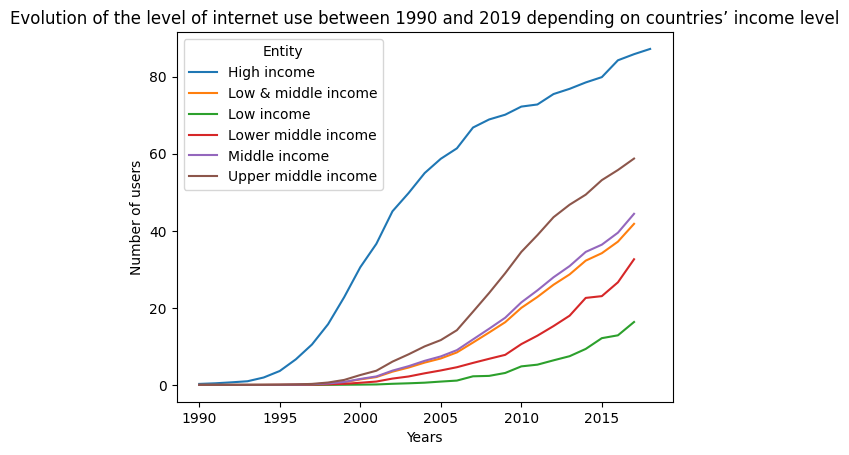

In [30]:
# Comparison of the number of internet users depending on the level of income

dataframe1=internet[internet["Entity"].isin(['High income' ,'Low income','Lower middle income' ,"Low & middle income",
                                         'Upper middle income',"Middle income"])].groupby(["Year","Entity"])["Internet_Usage"].sum()
    
dataframe2=dataframe1.unstack(level=1)
dataframe2.plot()
plt.title("Evolution of the level of internet use between 1990 and 2019 depending on countries’ income level")
plt.ylabel("Number of users")
plt.xlabel("Years")

In [31]:
print(broadband[broadband['Code'].isnull()]["Entity"].unique())

['East Asia and Pacific' 'Europe and Central Asia' 'European Union'
 'High income' 'Latin America and Caribbean' 'Low and middle income'
 'Low income' 'Lower middle income' 'Middle East and North Africa'
 'Middle income' 'North America' 'South Asia' 'Sub-Saharan Africa'
 'Upper middle income']


Text(0.5, 0, 'Years')

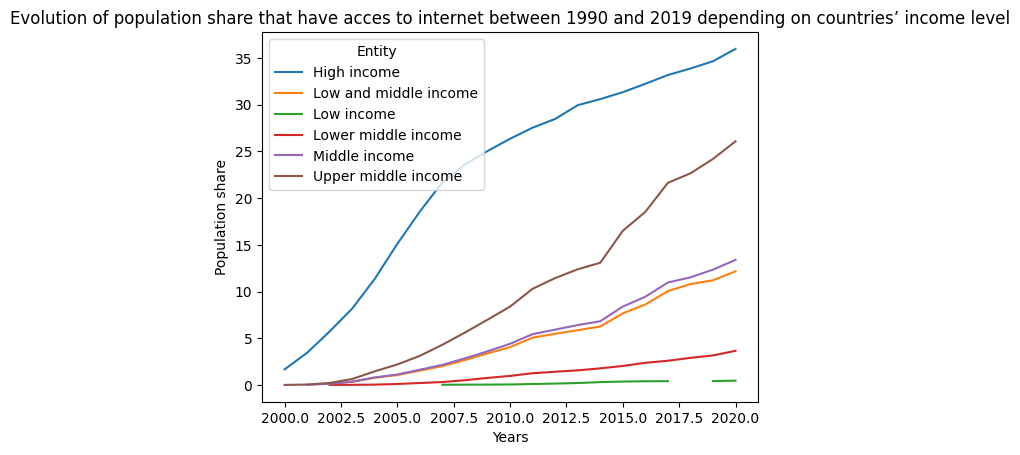

In [32]:
# The population share that have acces to internet in different groups

dataframe1=broadband[broadband["Entity"].isin(['High income' ,'Low income','Low and middle income' , 'Lower middle income', 'Middle income',
                                         'Upper middle income'])].groupby(["Year","Entity"])["Broadband_Subscriptions"].sum()
    
dataframe2=dataframe1.unstack(level=1)
dataframe2.plot()
plt.title("Evolution of population share that have acces to internet between 1990 and 2019 depending on countries’ income level")
plt.ylabel("Population share")
plt.xlabel("Years")

We notice many similarities between the two previous charts: the evolution of internet usage and the acces to internet is the same in all the countries groups. We can think that those two indicators depend on the countres’ income levels, and that there is a positive correlation between the two indicators, this is what we will check in the section below.

In [33]:
# Correlation between acces to internet and usage in 2019

internet1=internet[internet["Year"]==2019]
broadband1=broadband[broadband["Year"]==2019]
joined_data=internet1.merge(broadband1, on="Entity")

print(joined_data[["Internet_Usage","Broadband_Subscriptions"]].corr())


                         Internet_Usage  Broadband_Subscriptions
Internet_Usage                 1.000000                 0.559008
Broadband_Subscriptions        0.559008                 1.000000


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


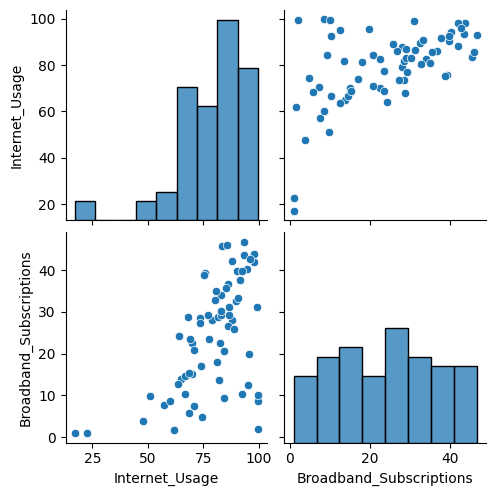

In [34]:
# Visualizing the correlation 
sns.pairplot(joined_data[["Internet_Usage","Broadband_Subscriptions"]])